In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)

In [2]:
df1 = pd.read_csv('combine.csv')
df2 = pd.read_csv('NFLDraftHistory.csv')

In [3]:
df1.head()

,Unnamed: 0,Player_Name,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year
0,0,John Abraham,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000.0
1,1,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000.0
2,2,Darnell Alford,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000.0
3,3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000.0
4,4,Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000.0


In [4]:
df1.columns

Index(['Unnamed: 0', 'Player_Name', 'Pos', 'School', 'Ht', 'Wt', '40yd',
       'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'draft_year'],
      dtype='object')

In [5]:
df1 = df1.drop(labels="Unnamed: 0", axis=1)
df1.shape

(7680, 12)

In [6]:
df2.shape

(8555, 36)

In [7]:
df2.head()

,draft_year,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,Player_Name,hof,Pos,category,side,School,age,to,allpro,probowls,seasons_started,w_av,car_av,dr_av,games,pass_completions,pass_attempts,pass_yards,pass_tds,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
0,1990,1,1,IND,NaN,GeorJe00,jeff-george-1,Jeff George,False,QB,QB,O,Illinois,22.0,2001.0,0,0,9,66.0,NaN,16.0,131.0,2298.0,3967.0,27602.0,154.0,113.0,168.0,307.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1990,1,2,NYJ,NaN,ThomBl00,blair-thomas-1,Blair Thomas,False,RB,RB,O,Penn St.,22.0,1995.0,0,0,3,20.0,NaN,18.0,64.0,1.0,1.0,16.0,1.0,0.0,533.0,2236.0,7.0,71.0,513.0,2.0,NaN,NaN,NaN
2,1990,1,3,SEA,NaN,KennCo00,NaN,Cortez Kennedy,True,DT,DL,D,Miami (FL),22.0,2000.0,3,8,9,97.0,NaN,97.0,167.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,58.0
3,1990,1,4,TAM,NaN,McCaKe21,keith-mccants-1,Keith McCants,False,DE,DL,D,Alabama,22.0,1995.0,0,0,2,20.0,NaN,14.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,13.5
4,1990,1,5,SDG,NaN,SeauJu00,junior-seau-1,Junior Seau,True,LB,LB,D,USC,21.0,2009.0,6,12,16,133.0,NaN,125.0,268.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,NaN,18.0,56.5


In [8]:
df2.columns

Index(['draft_year', 'round', 'pick', 'team', 'gsis_id', 'pfr_player_id',
       'cfb_player_id', 'Player_Name', 'hof', 'Pos', 'category', 'side',
       'School', 'age', 'to', 'allpro', 'probowls', 'seasons_started', 'w_av',
       'car_av', 'dr_av', 'games', 'pass_completions', 'pass_attempts',
       'pass_yards', 'pass_tds', 'pass_ints', 'rush_atts', 'rush_yards',
       'rush_tds', 'receptions', 'rec_yards', 'rec_tds', 'def_solo_tackles',
       'def_ints', 'def_sacks'],
      dtype='object')

In [9]:
df2 = df2.loc[df2["draft_year"] > 1999]
df2.shape

(5871, 36)

In [10]:
df2.head()

,draft_year,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,Player_Name,hof,Pos,category,side,School,age,to,allpro,probowls,seasons_started,w_av,car_av,dr_av,games,pass_completions,pass_attempts,pass_yards,pass_tds,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
2684,2000,1,1,CLE,NaN,BrowCo22,courtney-brown-1,Courtney Brown,False,DE,DL,D,Penn St.,22.0,2005.0,0,0,4,27.0,NaN,21.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,NaN,19.0
2685,2000,1,2,WAS,NaN,ArriLa00,lavar-arrington-1,LaVar Arrington,False,LB,LB,D,Penn St.,22.0,2006.0,0,3,5,46.0,NaN,45.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,338.0,3.0,23.5
2686,2000,1,3,WAS,NaN,SamuCh00,chris-samuels-2,Chris Samuels,False,T,OL,O,Alabama,23.0,2009.0,0,6,9,63.0,NaN,63.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2687,2000,1,4,CIN,NaN,WarrPe00,peter-warrick-1,Peter Warrick,False,WR,WR,O,Florida St.,23.0,2005.0,0,0,4,27.0,NaN,25.0,79.0,0.0,0.0,0.0,0.0,0.0,53.0,360.0,2.0,275.0,2991.0,18.0,3.0,NaN,NaN
2688,2000,1,5,BAL,NaN,LewiJa00,jamal-lewis-2,Jamal Lewis,False,RB,RB,O,Tennessee,21.0,2009.0,1,1,9,69.0,NaN,53.0,131.0,0.0,0.0,0.0,0.0,0.0,2542.0,10607.0,58.0,221.0,1879.0,4.0,NaN,NaN,NaN


In [11]:
df3 = pd.merge(df1, df2, on=['Player_Name','Pos','draft_year'])
df3.head()

,Player_Name,Pos,School_x,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,hof,category,side,School_y,age,to,allpro,probowls,seasons_started,w_av,car_av,dr_av,games,pass_completions,pass_attempts,pass_yards,pass_tds,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
0,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000.0,1,19,SEA,NaN,AlexSh00,shaun-alexander-1,False,RB,O,Alabama,23.0,2008.0,1,3,7,68.0,NaN,68.0,123.0,0.0,0.0,0.0,0.0,0.0,2187.0,9453.0,100.0,215.0,1520.0,12.0,NaN,NaN,NaN
1,Anthony Becht,TE,West Virginia,6-6,270.0,4.78,33.5,NaN,123.0,6.94,4.08,2000.0,1,27,NYJ,NaN,BechAn00,anthony-becht-1,False,TE,O,West Virginia,23.0,2011.0,0,0,9,12.0,NaN,10.0,167.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188.0,1537.0,21.0,6.0,NaN,NaN
2,Michael Boireau,DE,Miami (FL),6-4,274.0,5.09,29.0,26.0,105.0,7.68,4.49,2000.0,2,56,MIN,NaN,NaN,NaN,False,DL,D,Miami (FL),NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Brady,QB,Michigan,6-4,211.0,5.28,24.5,NaN,99.0,7.20,4.38,2000.0,6,199,NWE,00-0019596,BradTo00,tom-brady-1,False,QB,O,Michigan,23.0,2022.0,3,15,21,184.0,NaN,168.0,335.0,7753.0,12050.0,89214.0,649.0,212.0,693.0,1123.0,28.0,3.0,65.0,0.0,1.0,NaN,NaN
4,Courtney Brown,DE,Penn State,6-5,269.0,4.78,NaN,NaN,NaN,NaN,NaN,2000.0,1,1,CLE,NaN,BrowCo22,courtney-brown-1,False,DL,D,Penn St.,22.0,2005.0,0,0,4,27.0,NaN,21.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,NaN,19.0


In [12]:
df3.shape

(2788, 45)

In [13]:
df4 = df3.loc[df3["Pos"] == "QB"]
df4.head()

,Player_Name,Pos,School_x,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,hof,category,side,School_y,age,to,allpro,probowls,seasons_started,w_av,car_av,dr_av,games,pass_completions,pass_attempts,pass_yards,pass_tds,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
3,Tom Brady,QB,Michigan,6-4,211.0,5.28,24.5,NaN,99.0,7.20,4.38,2000.0,6,199,NWE,00-0019596,BradTo00,tom-brady-1,False,QB,O,Michigan,23.0,2022.0,3,15,21,184.0,NaN,168.0,335.0,7753.0,12050.0,89214.0,649.0,212.0,693.0,1123.0,28.0,3.0,65.0,0.0,1.0,NaN,NaN
5,Marc Bulger,QB,West Virginia,6-2,208.0,4.97,NaN,NaN,100.0,7.46,4.34,2000.0,6,168,NOR,NaN,BulgMa00,marc-bulger-1,False,QB,O,West Virginia,23.0,2009.0,0,2,8,57.0,NaN,NaN,96.0,1969.0,3171.0,22814.0,122.0,93.0,118.0,300.0,8.0,4.0,21.0,0.0,NaN,NaN,NaN
8,Giovanni Carmazzi,QB,Hofstra,6-3,224.0,4.74,36.5,NaN,119.0,6.94,4.23,2000.0,3,65,SFO,NaN,NaN,NaN,False,QB,O,Hofstra,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Joe Hamilton,QB,Georgia Tech,5-10,192.0,4.81,NaN,NaN,106.0,NaN,NaN,2000.0,7,234,TAM,NaN,HamiJo20,joe-hamilton-1,False,QB,O,Georgia Tech,23.0,2000.0,0,0,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
34,Todd Husak,QB,Stanford,6-3,216.0,5.20,27.5,NaN,99.0,7.17,4.41,2000.0,6,202,WAS,NaN,HusaTo20,todd-husak-1,False,QB,O,Stanford,22.0,2000.0,0,0,0,0.0,NaN,0.0,1.0,2.0,2.0,-2.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [14]:
df4.shape

(243, 45)

In [15]:
df4

,Player_Name,Pos,School_x,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,hof,category,side,School_y,age,to,allpro,probowls,seasons_started,w_av,car_av,dr_av,games,pass_completions,pass_attempts,pass_yards,pass_tds,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
3,Tom Brady,QB,Michigan,6-4,211.0,5.28,24.5,NaN,99.0,7.20,4.38,2000.0,6,199,NWE,00-0019596,BradTo00,tom-brady-1,False,QB,O,Michigan,23.0,2022.0,3,15,21,184.0,NaN,168.0,335.0,7753.0,12050.0,89214.0,649.0,212.0,693.0,1123.0,28.0,3.0,65.0,0.0,1.0,NaN,NaN
5,Marc Bulger,QB,West Virginia,6-2,208.0,4.97,NaN,NaN,100.0,7.46,4.34,2000.0,6,168,NOR,NaN,BulgMa00,marc-bulger-1,False,QB,O,West Virginia,23.0,2009.0,0,2,8,57.0,NaN,NaN,96.0,1969.0,3171.0,22814.0,122.0,93.0,118.0,300.0,8.0,4.0,21.0,0.0,NaN,NaN,NaN
8,Giovanni Carmazzi,QB,Hofstra,6-3,224.0,4.74,36.5,NaN,119.0,6.94,4.23,2000.0,3,65,SFO,NaN,NaN,NaN,False,QB,O,Hofstra,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Joe Hamilton,QB,Georgia Tech,5-10,192.0,4.81,NaN,NaN,106.0,NaN,NaN,2000.0,7,234,TAM,NaN,HamiJo20,joe-hamilton-1,False,QB,O,Georgia Tech,23.0,2000.0,0,0,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
34,Todd Husak,QB,Stanford,6-3,216.0,5.20,27.5,NaN,99.0,7.17,4.41,2000.0,6,202,WAS,NaN,HusaTo20,todd-husak-1,False,QB,O,Stanford,22.0,2000.0,0,0,0,0.0,NaN,0.0,1.0,2.0,2.0,-2.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,Brock Purdy,QB,Iowa St.,6-1,212.0,4.84,27.0,NaN,NaN,7.21,4.45,2022.0,7,262,SFO,NaN,PurdBr00,brock-purdy-1,False,QB,O,Iowa St.,22.0,2022.0,0,0,0,6.0,NaN,6.0,9.0,114.0,170.0,1374.0,13.0,4.0,22.0,13.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
2752,Desmond Ridder,QB,Cincinnati,6-3,211.0,4.52,36.0,NaN,127.0,7.15,4.29,2022.0,3,74,ATL,NaN,RiddDe00,desmond-ridder-1,False,QB,O,Cincinnati,23.0,2022.0,0,0,0,3.0,NaN,3.0,4.0,73.0,115.0,708.0,2.0,0.0,16.0,64.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2765,Skylar Thompson,QB,Kansas St.,6-2,217.0,4.91,31.0,NaN,112.0,7.00,4.28,2022.0,7,247,MIA,NaN,ThomSk00,skylar-thompson-1,False,QB,O,Kansas St.,25.0,2022.0,0,0,0,2.0,NaN,2.0,7.0,60.0,105.0,534.0,1.0,3.0,14.0,21.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2779,Malik Willis,QB,Liberty,6-1,219.0,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,3,86,TEN,NaN,WillMa12,malik-willis-1,False,QB,O,Liberty,23.0,2022.0,0,0,0,1.0,NaN,1.0,8.0,31.0,61.0,276.0,0.0,3.0,27.0,123.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN


In [16]:
df4 = df4.drop(labels=['gsis_id', 'pfr_player_id','cfb_player_id','hof','category', 'side','to', 'allpro', 'probowls', 'seasons_started', 'w_av',
       'car_av', 'dr_av', 'games', 'pass_completions', 'pass_attempts',
       'pass_yards', 'pass_tds', 'pass_ints', 'rush_atts', 'rush_yards',
       'rush_tds', 'receptions', 'rec_yards', 'rec_tds', 'def_solo_tackles',
       'def_ints', 'def_sacks','School_y'], axis=1)
df4.head()

,Player_Name,Pos,School_x,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year,round,pick,team,age
3,Tom Brady,QB,Michigan,6-4,211.0,5.28,24.5,NaN,99.0,7.20,4.38,2000.0,6,199,NWE,23.0
5,Marc Bulger,QB,West Virginia,6-2,208.0,4.97,NaN,NaN,100.0,7.46,4.34,2000.0,6,168,NOR,23.0
8,Giovanni Carmazzi,QB,Hofstra,6-3,224.0,4.74,36.5,NaN,119.0,6.94,4.23,2000.0,3,65,SFO,NaN
29,Joe Hamilton,QB,Georgia Tech,5-10,192.0,4.81,NaN,NaN,106.0,NaN,NaN,2000.0,7,234,TAM,23.0
34,Todd Husak,QB,Stanford,6-3,216.0,5.20,27.5,NaN,99.0,7.17,4.41,2000.0,6,202,WAS,22.0


In [17]:
df4.describe()

,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year,round,pick,age
count,243.000000,226.000000,185.000000,8.00000,186.000000,174.000000,176.000000,243.000000,243.000000,243.000000,231.000000
mean,223.596708,4.812876,31.364865,22.12500,111.220430,7.123736,4.307102,2010.757202,3.674897,108.004115,22.805195
std,10.589734,0.171659,3.261369,1.95941,6.799826,0.226313,0.168327,6.533030,2.137154,79.373294,1.063697
min,192.000000,4.330000,21.500000,19.00000,96.000000,6.650000,3.870000,2000.000000,1.000000,1.000000,21.000000
25%,217.000000,4.710000,29.000000,21.50000,106.000000,6.952500,4.180000,2005.000000,1.000000,29.000000,22.000000
50%,223.000000,4.810000,31.000000,22.00000,111.000000,7.105000,4.300000,2011.000000,4.000000,103.000000,23.000000
75%,229.500000,4.907500,33.500000,23.25000,115.000000,7.235000,4.422500,2016.000000,6.000000,175.500000,23.000000
max,265.000000,5.370000,38.500000,25.00000,128.000000,7.800000,4.780000,2022.000000,7.000000,262.000000,29.000000


In [18]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 3 to 2787
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player_Name  243 non-null    object 
 1   Pos          243 non-null    object 
 2   School_x     243 non-null    object 
 3   Ht           243 non-null    object 
 4   Wt           243 non-null    float64
 5   40yd         226 non-null    float64
 6   Vertical     185 non-null    float64
 7   Bench        8 non-null      float64
 8   Broad Jump   186 non-null    float64
 9   3Cone        174 non-null    float64
 10  Shuttle      176 non-null    float64
 11  draft_year   243 non-null    float64
 12  round        243 non-null    int64  
 13  pick         243 non-null    int64  
 14  team         243 non-null    object 
 15  age          231 non-null    float64
dtypes: float64(9), int64(2), object(5)
memory usage: 32.3+ KB


In [19]:
df4 = df4.drop(labels=['Bench'], axis=1)

In [20]:
df4['QBpick'] = df4.groupby('draft_year')['pick'].rank(ascending=True)

In [21]:
df4

,Player_Name,Pos,School_x,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,draft_year,round,pick,team,age,QBpick
3,Tom Brady,QB,Michigan,6-4,211.0,5.28,24.5,99.0,7.20,4.38,2000.0,6,199,NWE,23.0,7.0
5,Marc Bulger,QB,West Virginia,6-2,208.0,4.97,NaN,100.0,7.46,4.34,2000.0,6,168,NOR,23.0,5.0
8,Giovanni Carmazzi,QB,Hofstra,6-3,224.0,4.74,36.5,119.0,6.94,4.23,2000.0,3,65,SFO,NaN,2.0
29,Joe Hamilton,QB,Georgia Tech,5-10,192.0,4.81,NaN,106.0,NaN,NaN,2000.0,7,234,TAM,23.0,11.0
34,Todd Husak,QB,Stanford,6-3,216.0,5.20,27.5,99.0,7.17,4.41,2000.0,6,202,WAS,22.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,Brock Purdy,QB,Iowa St.,6-1,212.0,4.84,27.0,NaN,7.21,4.45,2022.0,7,262,SFO,22.0,8.0
2752,Desmond Ridder,QB,Cincinnati,6-3,211.0,4.52,36.0,127.0,7.15,4.29,2022.0,3,74,ATL,23.0,2.0
2765,Skylar Thompson,QB,Kansas St.,6-2,217.0,4.91,31.0,112.0,7.00,4.28,2022.0,7,247,MIA,25.0,7.0
2779,Malik Willis,QB,Liberty,6-1,219.0,NaN,NaN,NaN,NaN,NaN,2022.0,3,86,TEN,23.0,3.0


In [22]:
df4[['ft','inch']] = df4['Ht'].str.split("-", expand=True)

In [23]:
df4

,Player_Name,Pos,School_x,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,draft_year,round,pick,team,age,QBpick,ft,inch
3,Tom Brady,QB,Michigan,6-4,211.0,5.28,24.5,99.0,7.20,4.38,2000.0,6,199,NWE,23.0,7.0,6,4
5,Marc Bulger,QB,West Virginia,6-2,208.0,4.97,NaN,100.0,7.46,4.34,2000.0,6,168,NOR,23.0,5.0,6,2
8,Giovanni Carmazzi,QB,Hofstra,6-3,224.0,4.74,36.5,119.0,6.94,4.23,2000.0,3,65,SFO,NaN,2.0,6,3
29,Joe Hamilton,QB,Georgia Tech,5-10,192.0,4.81,NaN,106.0,NaN,NaN,2000.0,7,234,TAM,23.0,11.0,5,10
34,Todd Husak,QB,Stanford,6-3,216.0,5.20,27.5,99.0,7.17,4.41,2000.0,6,202,WAS,22.0,8.0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,Brock Purdy,QB,Iowa St.,6-1,212.0,4.84,27.0,NaN,7.21,4.45,2022.0,7,262,SFO,22.0,8.0,6,1
2752,Desmond Ridder,QB,Cincinnati,6-3,211.0,4.52,36.0,127.0,7.15,4.29,2022.0,3,74,ATL,23.0,2.0,6,3
2765,Skylar Thompson,QB,Kansas St.,6-2,217.0,4.91,31.0,112.0,7.00,4.28,2022.0,7,247,MIA,25.0,7.0,6,2
2779,Malik Willis,QB,Liberty,6-1,219.0,NaN,NaN,NaN,NaN,NaN,2022.0,3,86,TEN,23.0,3.0,6,1


In [24]:
df4["ft"]=df4["ft"].astype(int)
df4["inch"]=df4["inch"].astype(int)

In [25]:
df4["Ht"] = (df4["ft"] * 30.48 + df4["inch"] * 2.54)

In [26]:
df4

,Player_Name,Pos,School_x,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,draft_year,round,pick,team,age,QBpick,ft,inch
3,Tom Brady,QB,Michigan,193.04,211.0,5.28,24.5,99.0,7.20,4.38,2000.0,6,199,NWE,23.0,7.0,6,4
5,Marc Bulger,QB,West Virginia,187.96,208.0,4.97,NaN,100.0,7.46,4.34,2000.0,6,168,NOR,23.0,5.0,6,2
8,Giovanni Carmazzi,QB,Hofstra,190.50,224.0,4.74,36.5,119.0,6.94,4.23,2000.0,3,65,SFO,NaN,2.0,6,3
29,Joe Hamilton,QB,Georgia Tech,177.80,192.0,4.81,NaN,106.0,NaN,NaN,2000.0,7,234,TAM,23.0,11.0,5,10
34,Todd Husak,QB,Stanford,190.50,216.0,5.20,27.5,99.0,7.17,4.41,2000.0,6,202,WAS,22.0,8.0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,Brock Purdy,QB,Iowa St.,185.42,212.0,4.84,27.0,NaN,7.21,4.45,2022.0,7,262,SFO,22.0,8.0,6,1
2752,Desmond Ridder,QB,Cincinnati,190.50,211.0,4.52,36.0,127.0,7.15,4.29,2022.0,3,74,ATL,23.0,2.0,6,3
2765,Skylar Thompson,QB,Kansas St.,187.96,217.0,4.91,31.0,112.0,7.00,4.28,2022.0,7,247,MIA,25.0,7.0,6,2
2779,Malik Willis,QB,Liberty,185.42,219.0,NaN,NaN,NaN,NaN,NaN,2022.0,3,86,TEN,23.0,3.0,6,1


In [27]:
df4 = df4.drop(labels=['ft','inch'], axis=1)

In [28]:
df4

,Player_Name,Pos,School_x,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,draft_year,round,pick,team,age,QBpick
3,Tom Brady,QB,Michigan,193.04,211.0,5.28,24.5,99.0,7.20,4.38,2000.0,6,199,NWE,23.0,7.0
5,Marc Bulger,QB,West Virginia,187.96,208.0,4.97,NaN,100.0,7.46,4.34,2000.0,6,168,NOR,23.0,5.0
8,Giovanni Carmazzi,QB,Hofstra,190.50,224.0,4.74,36.5,119.0,6.94,4.23,2000.0,3,65,SFO,NaN,2.0
29,Joe Hamilton,QB,Georgia Tech,177.80,192.0,4.81,NaN,106.0,NaN,NaN,2000.0,7,234,TAM,23.0,11.0
34,Todd Husak,QB,Stanford,190.50,216.0,5.20,27.5,99.0,7.17,4.41,2000.0,6,202,WAS,22.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,Brock Purdy,QB,Iowa St.,185.42,212.0,4.84,27.0,NaN,7.21,4.45,2022.0,7,262,SFO,22.0,8.0
2752,Desmond Ridder,QB,Cincinnati,190.50,211.0,4.52,36.0,127.0,7.15,4.29,2022.0,3,74,ATL,23.0,2.0
2765,Skylar Thompson,QB,Kansas St.,187.96,217.0,4.91,31.0,112.0,7.00,4.28,2022.0,7,247,MIA,25.0,7.0
2779,Malik Willis,QB,Liberty,185.42,219.0,NaN,NaN,NaN,NaN,NaN,2022.0,3,86,TEN,23.0,3.0


In [29]:
X = df4.loc[:,'Ht':'Shuttle']

In [30]:
Y = df4['pick']

<Axes: >

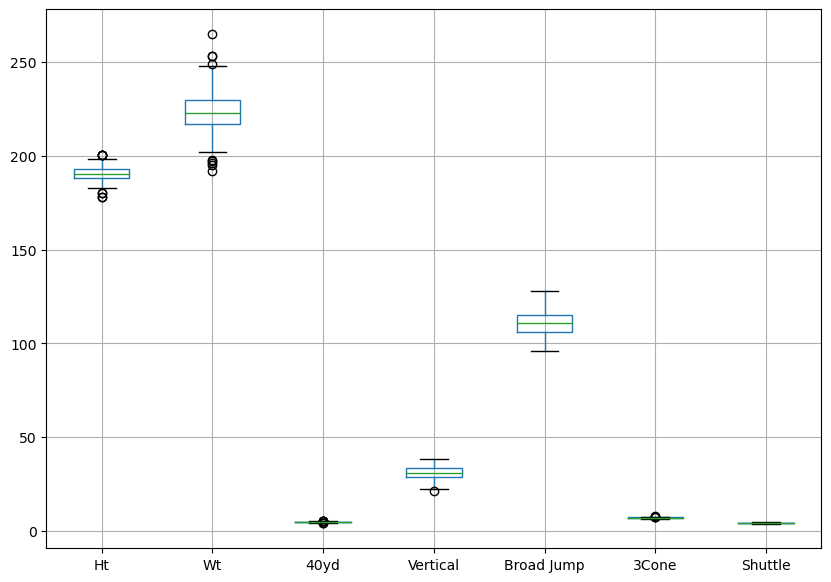

In [31]:
plt.figure(figsize=(10,7))
X.boxplot()

In [32]:
test = df4.loc[df4["draft_year"] < 2018]

In [33]:
test

,Player_Name,Pos,School_x,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,draft_year,round,pick,team,age,QBpick
3,Tom Brady,QB,Michigan,193.04,211.0,5.28,24.5,99.0,7.20,4.38,2000.0,6,199,NWE,23.0,7.0
5,Marc Bulger,QB,West Virginia,187.96,208.0,4.97,NaN,100.0,7.46,4.34,2000.0,6,168,NOR,23.0,5.0
8,Giovanni Carmazzi,QB,Hofstra,190.50,224.0,4.74,36.5,119.0,6.94,4.23,2000.0,3,65,SFO,NaN,2.0
29,Joe Hamilton,QB,Georgia Tech,177.80,192.0,4.81,NaN,106.0,NaN,NaN,2000.0,7,234,TAM,23.0,11.0
34,Todd Husak,QB,Stanford,190.50,216.0,5.20,27.5,99.0,7.17,4.41,2000.0,6,202,WAS,22.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,Patrick Mahomes,QB,Texas Tech,187.96,225.0,4.80,30.0,114.0,6.88,4.08,2017.0,1,10,KAN,21.0,2.0
2015,Nathan Peterman,QB,Pittsburgh,187.96,226.0,4.82,31.0,110.0,7.14,4.31,2017.0,5,171,BUF,23.0,8.0
2046,Mitchell Trubisky,QB,North Carolina,187.96,222.0,4.67,27.5,116.0,6.87,4.25,2017.0,1,2,CHI,23.0,1.0
2051,Deshaun Watson,QB,Clemson,187.96,221.0,4.66,32.5,119.0,6.95,4.31,2017.0,1,12,HOU,21.0,3.0


In [34]:
X_test = test.loc[:,'Ht':'Shuttle']

In [35]:
Y_test = test['pick']

In [36]:
train = df4.loc[df4["draft_year"] >= 2018]

In [37]:
X_train = train.loc[:,'Ht':'Shuttle']

In [38]:
Y_train = train['pick']

In [39]:
from sklearn import preprocessing

In [40]:
scaler=preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [41]:
scaler.mean_

array([189.8904    , 220.4       ,   4.79594595,  31.31081081,
       113.47058824,   7.1053125 ,   4.36      ])

In [42]:
scaler.scale_

array([4.4738623 , 7.69935062, 0.14960235, 2.89302832, 6.33494182,
       0.17211886, 0.16001894])

In [43]:
X_train_normalized = scaler.transform(X_train)

In [44]:
X_train_normalized.mean(axis=0)

array([-7.63833441e-16, -7.17204074e-16,             nan,             nan,
                   nan,             nan,             nan])

In [45]:
X_train_normalized.std(axis=0)

array([ 1.,  1., nan, nan, nan, nan, nan])

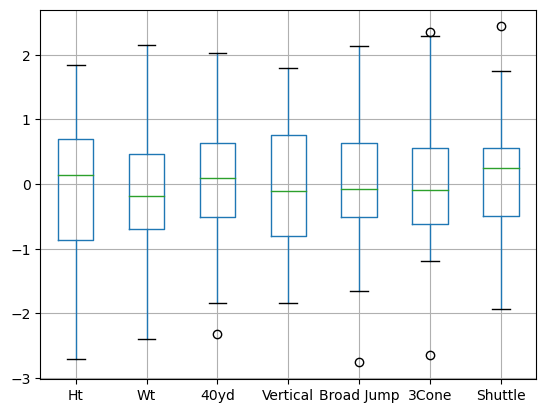

In [46]:
df_train_normalized = X_train.copy()
df_train_normalized.loc[:,'Ht':'Shuttle'] = X_train_normalized
df_train_normalized.boxplot();

In [47]:
scaler=preprocessing.StandardScaler()
scaler.fit(X_test)

StandardScaler()

In [48]:
scaler.mean_

array([190.77637306, 224.42487047,   4.81619048,  31.37837838,
       110.71710526,   7.12788732,   4.2948951 ])

In [49]:
scaler.scale_

array([ 4.22781774, 11.04187991,  0.17501711,  3.33623717,  6.77594212,
        0.23585873,  0.16724367])

In [50]:
x_test_normalized = scaler.transform(X_test)

In [51]:
x_test_normalized.mean(axis=0)

array([-2.69674898e-15,  4.97011758e-16,             nan,             nan,
                   nan,             nan,             nan])

In [52]:
x_test_normalized.std(axis=0)

array([ 1.,  1., nan, nan, nan, nan, nan])

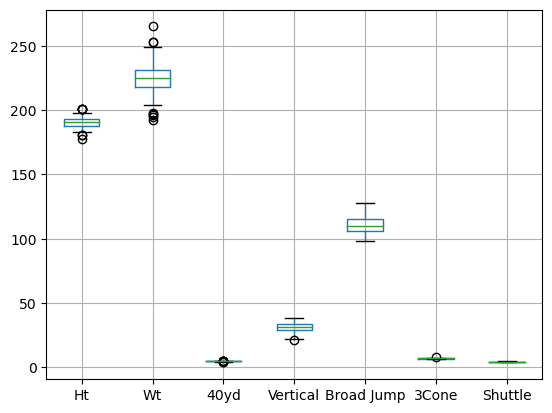

In [53]:
x_test_normalized = X_test.copy()
x_test_normalized.loc[:,'Ht':'Shuttle'] = x_test_normalized
x_test_normalized.boxplot();

In [54]:
Y_test.value_counts()/Y_test.shape[0]

1      0.062176
22     0.025907
135    0.020725
201    0.020725
3      0.020725
         ...   
24     0.005181
145    0.005181
67     0.005181
248    0.005181
87     0.005181
Name: pick, Length: 122, dtype: float64

In [55]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((50, 7), (193, 7), (50,), (193,))

In [56]:
reg=LogisticRegression(max_iter=500)
reg.fit(X_train,Y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [57]:
df5 = df4.dropna()
df5.shape

(155, 16)

In [59]:
X = df5.loc[:,'Ht':'Shuttle']

In [60]:
Y = df5['pick']

<Axes: >

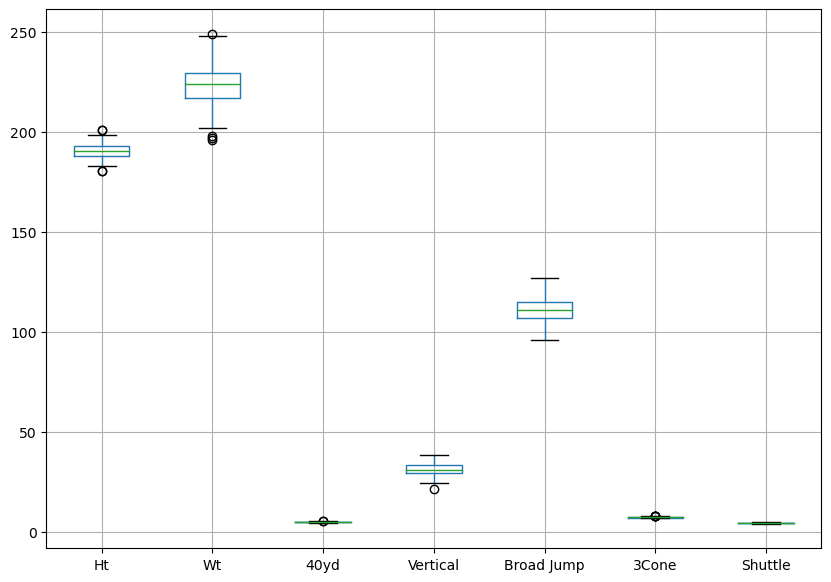

In [61]:
plt.figure(figsize=(10,7))
X.boxplot()

In [63]:
test = df5.loc[df5["draft_year"] < 2018]
X_test = test.loc[:,'Ht':'Shuttle']
Y_test = test['pick']
train = df5.loc[df5["draft_year"] >= 2018]
X_train = train.loc[:,'Ht':'Shuttle']
Y_train = train['pick']

In [64]:
scaler=preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [65]:
scaler.mean_

array([190.41806452, 221.09677419,   4.80322581,  31.67741935,
       113.19354839,   7.10193548,   4.35935484])

In [66]:
scaler.scale_

array([4.20513466, 8.13734854, 0.13768564, 2.5982264 , 5.85534966,
       0.17382638, 0.16382397])

In [67]:
x_test_normalized = scaler.transform(X_test)

In [68]:
x_test_normalized.mean(axis=0)

array([ 0.11690777,  0.39641985,  0.12241537, -0.12260224, -0.41318708,
        0.08490118, -0.38593746])

In [69]:
x_test_normalized.std(axis=0)

array([0.95315485, 1.24891127, 1.30809019, 1.2265164 , 1.14109476,
       1.34823127, 1.02563246])

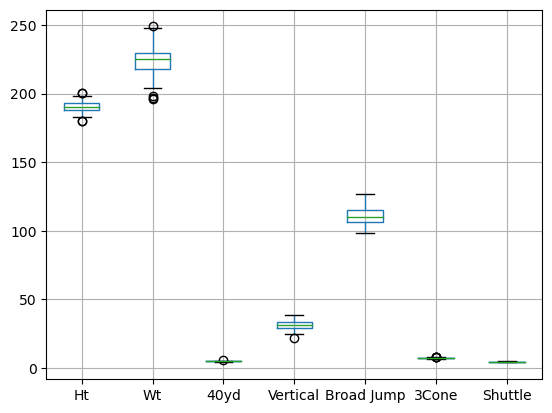

In [70]:
x_test_normalized = X_test.copy()
x_test_normalized.loc[:,'Ht':'Shuttle'] = x_test_normalized
x_test_normalized.boxplot();

In [71]:
Y_test.value_counts()/Y_test.shape[0]

1      0.056452
135    0.032258
250    0.024194
201    0.024194
2      0.024194
         ...   
40     0.008065
193    0.008065
64     0.008065
85     0.008065
87     0.008065
Name: pick, Length: 91, dtype: float64

In [72]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((31, 7), (124, 7), (31,), (124,))

In [77]:
reg=LogisticRegression(max_iter=10000)
reg.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [78]:
predicted=reg.predict(X_test)
list(zip(predicted,Y_test))

[(3, 199),
 (3, 202),
 (64, 18),
 (3, 212),
 (3, 75),
 (64, 183),
 (133, 32),
 (218, 53),
 (74, 149),
 (64, 125),
 (10, 109),
 (218, 59),
 (249, 1),
 (249, 137),
 (64, 108),
 (67, 3),
 (3, 158),
 (26, 81),
 (3, 186),
 (100, 32),
 (7, 19),
 (249, 201),
 (244, 88),
 (249, 97),
 (74, 110),
 (125, 148),
 (74, 106),
 (244, 202),
 (7, 250),
 (244, 217),
 (244, 90),
 (244, 213),
 (244, 250),
 (10, 67),
 (10, 145),
 (67, 1),
 (67, 85),
 (133, 194),
 (244, 64),
 (100, 148),
 (197, 193),
 (67, 81),
 (1, 40),
 (67, 36),
 (171, 205),
 (108, 151),
 (42, 43),
 (3, 162),
 (1, 223),
 (219, 56),
 (122, 18),
 (244, 209),
 (244, 57),
 (67, 160),
 (10, 94),
 (67, 174),
 (7, 17),
 (42, 101),
 (244, 201),
 (166, 5),
 (244, 1),
 (197, 44),
 (244, 209),
 (171, 239),
 (42, 122),
 (244, 181),
 (67, 204),
 (100, 250),
 (64, 155),
 (7, 25),
 (249, 35),
 (244, 160),
 (7, 10),
 (64, 36),
 (7, 8),
 (249, 208),
 (7, 1),
 (7, 12),
 (10, 135),
 (224, 180),
 (249, 152),
 (67, 102),
 (100, 253),
 (244, 185),
 (7, 1),
 (1

<Axes: >

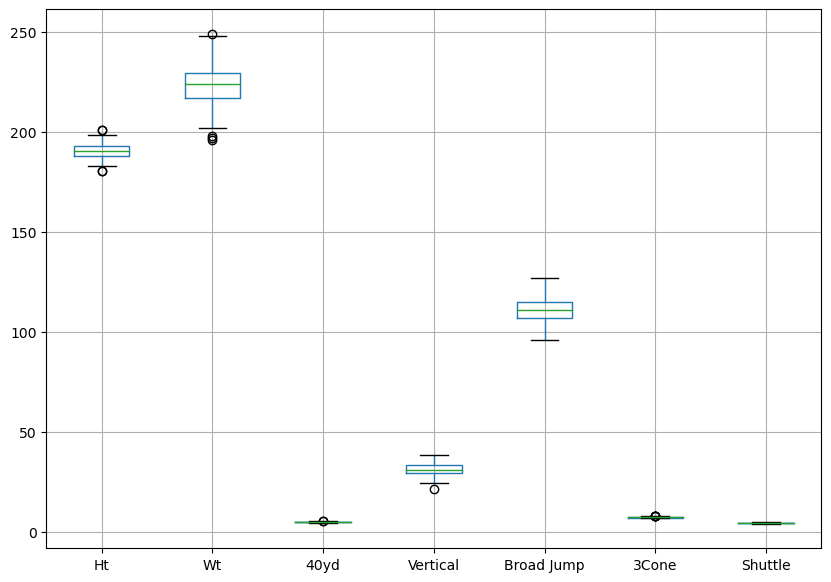

In [84]:
X = df5.loc[:,'Ht':'Shuttle']
Y = df5['QBpick']
plt.figure(figsize=(10,7))
X.boxplot()

In [85]:
test = df5.loc[df5["draft_year"] < 2018]
X_test = test.loc[:,'Ht':'Shuttle']
Y_test = test['QBpick']
train = df5.loc[df5["draft_year"] >= 2018]
X_train = train.loc[:,'Ht':'Shuttle']
Y_train = train['QBpick']

In [86]:
scaler=preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [87]:
scaler.mean_

array([190.41806452, 221.09677419,   4.80322581,  31.67741935,
       113.19354839,   7.10193548,   4.35935484])

In [88]:
scaler.scale_

array([4.20513466, 8.13734854, 0.13768564, 2.5982264 , 5.85534966,
       0.17382638, 0.16382397])

In [89]:
x_test_normalized = scaler.transform(X_test)

In [90]:
x_test_normalized.mean(axis=0)

array([ 0.11690777,  0.39641985,  0.12241537, -0.12260224, -0.41318708,
        0.08490118, -0.38593746])

In [91]:
x_test_normalized.std(axis=0)

array([0.95315485, 1.24891127, 1.30809019, 1.2265164 , 1.14109476,
       1.34823127, 1.02563246])

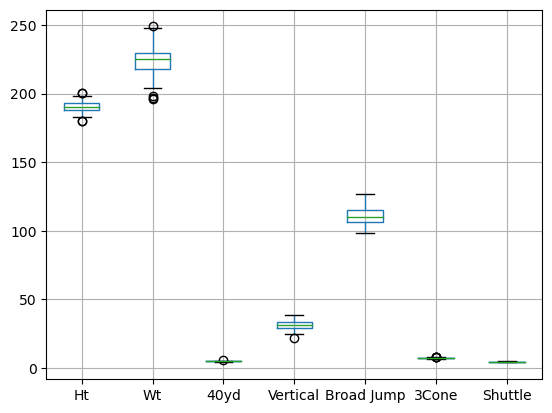

In [92]:
x_test_normalized = X_test.copy()
x_test_normalized.loc[:,'Ht':'Shuttle'] = x_test_normalized
x_test_normalized.boxplot();

In [93]:
Y_test.value_counts()/Y_test.shape[0]

5.0     0.120968
8.0     0.112903
7.0     0.096774
6.0     0.088710
2.0     0.088710
4.0     0.088710
1.0     0.080645
3.0     0.080645
10.0    0.072581
9.0     0.048387
11.0    0.048387
12.0    0.032258
13.0    0.024194
14.0    0.016129
Name: QBpick, dtype: float64

In [94]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((31, 7), (124, 7), (31,), (124,))

In [99]:
reg=LogisticRegression(max_iter=10000)
reg.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [100]:
predicted=reg.predict(X_test)
list(zip(predicted,Y_test))

[(10.0, 7.0),
 (12.0, 8.0),
 (8.0, 1.0),
 (8.0, 9.0),
 (8.0, 3.0),
 (8.0, 6.0),
 (12.0, 2.0),
 (9.0, 3.0),
 (10.0, 8.0),
 (9.0, 7.0),
 (4.0, 6.0),
 (9.0, 4.0),
 (4.0, 1.0),
 (8.0, 7.0),
 (11.0, 5.0),
 (10.0, 2.0),
 (8.0, 8.0),
 (4.0, 4.0),
 (8.0, 10.0),
 (8.0, 3.0),
 (3.0, 3.0),
 (12.0, 8.0),
 (11.0, 5.0),
 (4.0, 6.0),
 (10.0, 7.0),
 (11.0, 7.0),
 (10.0, 6.0),
 (11.0, 10.0),
 (11.0, 14.0),
 (11.0, 11.0),
 (4.0, 5.0),
 (4.0, 10.0),
 (11.0, 11.0),
 (4.0, 4.0),
 (6.0, 8.0),
 (10.0, 1.0),
 (10.0, 7.0),
 (8.0, 11.0),
 (8.0, 5.0),
 (9.0, 8.0),
 (10.0, 10.0),
 (4.0, 6.0),
 (7.0, 4.0),
 (7.0, 3.0),
 (4.0, 10.0),
 (6.0, 8.0),
 (8.0, 5.0),
 (6.0, 9.0),
 (2.0, 13.0),
 (11.0, 3.0),
 (6.0, 2.0),
 (11.0, 12.0),
 (11.0, 4.0),
 (10.0, 8.0),
 (6.0, 5.0),
 (6.0, 8.0),
 (3.0, 3.0),
 (4.0, 5.0),
 (8.0, 9.0),
 (11.0, 2.0),
 (8.0, 1.0),
 (10.0, 4.0),
 (8.0, 9.0),
 (8.0, 10.0),
 (8.0, 5.0),
 (11.0, 7.0),
 (6.0, 8.0),
 (10.0, 11.0),
 (4.0, 6.0),
 (9.0, 2.0),
 (8.0, 5.0),
 (11.0, 10.0),
 (3.0, 3.0),
 (4.0, 6.0